In [39]:
!pip install SpeechRecognition
!pip install matplotlib
!pip install librosa
!pip install pandas
!pip install tensorflow
!pip install transformers datasets evaluate seqeval
!pip install tf-keras
!pip install tensorflow[and-cuda]
!pip install ipywidgets --upgrade

In [40]:
import os
import librosa
import numpy as np
import json
import pandas as pd

In [41]:
# import speech_recognition as sr
# recognizer = sr.Recognizer()
# # input a file_path to a .wav file
# # returns the transcribed audio as a string
# # we can use BERT like in the homework to then tokenize/make into array and analyze it
# def getVectorOfWords(file_path):
#     with sr.AudioFile(file_path) as source:
#         audio = recognizer.record(source)
#     try:
#         # print("Transcription:", recognizer.recognize_google(audio))
#         return "" + recognizer.recognize_google(audio)
#     except sr.UnknownValueError:
#         return None

In [42]:
# removes all files from images folder so subsequent runs don't have weird overlaps
# def clearImagesFolder():
#     print("Deleting all data from images folder")
#     directory = os.getcwd() + "/images"
#     for root, dirs, files in os.walk(directory, topdown=False):  # topdown=False to delete files before dirs
#         for file_name in files:
#             file_path = os.path.join(root, file_name)
#             if os.path.isfile(file_path) and file_name.endswith('.png'):
#                 os.remove(file_path)
#                 # print("" + file_path + " has been removed successfully")
#     print("All images removed successfully!")

In [43]:
# import librosa.display
# import matplotlib.pyplot as plt
# # input a file_path to a .wav file
# # returns a png of the spectogram and a filepath to it
# def getSpectogram(file_path, emotion_label):
#     y, sr = librosa.load(file_path, sr=None) # load in the audio file and preserve its sample rate (replace with 16,000 if needed)
    
#     # Compute the spectrogram
#     D = librosa.stft(y)                        # Short-Time Fourier Transform
#     S_db = librosa.amplitude_to_db(abs(D), ref=np.max)  # Convert to decibel scale

#     # Plot and save the spectrogram
#     fig = plt.figure(figsize=(6, 6))                # Set the figure size -- > num pixels will be 100 times this
#     # can change the cmap to "viridis" or "plasma" for different color themes
#     librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log", cmap="magma")  # Log frequency scale to mimic human audio perception

#     # TODO: at first try hiding as many extra features as possible and compare to when they're included
#     # plt.colorbar(format="%+2.0f dB")           # Add a colorbar
#     # plt.title("Spectrogram")
#     # plt.xlabel("Time (s)")
#     # plt.ylabel("Frequency (Hz)")
#     plt.tight_layout()
    
#     # Save the spectrogram as an image file
#     processed_path = (file_path.split("/")[-1]).split(".")[0]
#     output_image_path = f"./images/{emotion_label}/{processed_path}.png"  # TODO: figure out naming conventions for the file -- either use path or just have a counter that we pass in
#     plt.savefig(output_image_path, dpi=300)    # Save as PNG with high resolution
#     plt.close()                                # Close the figure to free memory
    
#     return output_image_path

In [44]:
# def getTargetEmotionFromCSV(audio_file_name):
#     # parse audio_file_name to get distinguishing file info for CSV lookup
#     dialogueID, utteranceID = (audio_file_name.split(".wav")[0]).split('_')
#     dialogueID, utteranceID = int(dialogueID[3:]), int(utteranceID[3:])
#     csv = pd.read_csv('./train_sent_emo.csv')
#     # Filter the row(s) that satisfy both conditions
#     condition1 = (csv['Dialogue_ID'] == dialogueID)  # First column matches 'dialogueID'
#     condition2 = (csv['Utterance_ID'] == utteranceID)  # Second column matches 'utteranceID'
#     filtered_rows = csv[condition1 & condition2]
#     return filtered_rows['Emotion'].iloc[0]

In [45]:
# def traverse_audio_files(directory="./train_splits_wav"):
#     # clearImagesFolder() # deletes everything from the image folder
#     data = []
    
#     # Traverse and process .wav files
#     print("Starting audio file traversal")
#     iterCount = 0
#     for file_name in os.listdir(directory):
#         # limit the number of loops so this doesn't take THAT long
#         if iterCount >= 3000:
#             break
#         file_path = os.path.join(directory, file_name)
        
#         if os.path.isfile(file_path) and file_name.endswith('.wav'):
#             transcription = getVectorOfWords(file_path)
#             # filter out the audio files that can't get a clear transcription
#             if not transcription:
#                 continue
#             emotion = getTargetEmotionFromCSV(file_name)
#             image_path = getSpectogram(file_path, emotion)
#             data.append({"Transcription": transcription, "Spectogram": image_path, "Emotion": emotion})
#         iterCount += 1
#     df = pd.DataFrame(data)
#     print("Finished creating dataframe and traversing audio files")
#     return df

In [46]:
# df = traverse_audio_files()
# df.to_csv('data3000.csv', index=False)
# print(df)

In [47]:
df = pd.read_csv('data9000.csv')
emotion_labels = df['Emotion'].unique()
print(emotion_labels)
print(df)

# df = pd.read_csv('data_all_given_transcript.csv')
# emotion_labels = df['Emotion'].unique()
# print(emotion_labels)
# print(df)

print(df['Emotion'].value_counts())

['neutral' 'joy' 'fear' 'surprise' 'sadness' 'disgust' 'anger']
                                          Transcription  \
0                                                 Mrs M   
1                                     why did you write   
2                                 I heard what you said   
3                                            for a walk   
4     when did they made me head of purchasing thank...   
...                                                 ...   
3826  play Joey's lovable 2 but the thing about Joey...   
3827                                  what do you think   
3828                                         I guess so   
3829  so I'm just going to go back to talking to my ...   
3830                                               Ross   

                                 Spectogram   Emotion  
0      ./images9000/neutral/dia575_utt1.png   neutral  
1     ./images9000/neutral/dia689_utt12.png   neutral  
2      ./images9000/neutral/dia845_utt8.png   neutral  
3  

In [48]:
import matplotlib.pyplot as plt
import math
from tensorflow.keras.utils import load_img
def spec_augment(spectrogram, time_warp_param=10, freq_mask_param=15, time_mask_param=15):
    """Applies SpecAugment to a spectrogram.

    Args:
        spectrogram: The input spectrogram.
        time_warp_param: Maximum time shift for warping.
        freq_mask_param: Maximum frequency mask length.
        time_mask_param: Maximum time mask length.

    Returns:
        The augmented spectrogram.
    """

    augmented_spectrogram = spectrogram.copy()

    # Time warping
    time_shift = np.random.randint(-time_warp_param, time_warp_param + 1)
    augmented_spectrogram = np.roll(augmented_spectrogram, time_shift, axis=1)

    # Frequency masking
    num_freq_masks = np.random.randint(1, 3)
    for _ in range(num_freq_masks):
        freq_mask_length = np.random.randint(1, freq_mask_param + 1)
        freq_start = np.random.randint(0, augmented_spectrogram.shape[0] - freq_mask_length)
        augmented_spectrogram[freq_start:freq_start + freq_mask_length, :] = 0

    # Time masking
    num_time_masks = np.random.randint(1, 3)
    for _ in range(num_time_masks):
        time_mask_length = np.random.randint(1, time_mask_param + 1)
        time_start = np.random.randint(0, augmented_spectrogram.shape[1] - time_mask_length)
        augmented_spectrogram[:, time_start:time_start + time_mask_length] = 0

    return augmented_spectrogram

def augment_emotion(emotion, df, amount):
    newDf = df.copy()
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    value_counts = df['Emotion'].value_counts()
    frequency = value_counts.get(emotion, 0)  # Handle non-existent value
    frequency = math.ceil(frequency*amount)
    mx = 0
    for index, row in df.iterrows():
        if mx == frequency:
            break 
        spectrogram_path = row['Spectogram']
        curr_emotion = row['Emotion']
        path_arr = spectrogram_path.split("/")
        if len(path_arr) < 4:
            print(f"Invalid path format: {spectrogram_path}")
            continue  # Skip this row if the path is invalid
        file_name = path_arr[3]
        emotion_folder = path_arr[2]
        folder = path_arr[1]
        if curr_emotion == emotion:
            mx += 1 

            img = load_img(spectrogram_path)
            spectrogram = np.array(img)
            augmented_spectrogram = spec_augment(spectrogram)
            path = "./"  + "images9000" + "/" + emotion_folder + "/" + file_name.split(".")[0] + "augmented.png"
            plt.imsave(path, augmented_spectrogram, cmap='gray')
            if 'Sentiment' in row:
                newDf.loc[len(newDf)] = [row['Transcription'], path, emotion, row['Sentiment']]
            else:
                newDf.loc[len(newDf)] = [row['Transcription'], path, emotion]
    return newDf        

In [49]:
##### prepreocessing
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import keras.callbacks
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from transformers import DistilBertTokenizer
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


### balance dataset
balance = False
if balance:
    # augment the data
    # emotion_counts = df['Emotion'].value_counts()
    # lowest_emotions = emotion_counts.nsmallest(2).index.tolist()
    # for emotion in lowest_emotions:
    #     df = augment_emotion(emotion, df)
    
    # reduce the data
    neutral_class = 0  # Replace this with the actual index for "neutral" in factorized labels
    neutral_data = df[df['Emotion'] == "neutral"]
    non_neutral_data = df[df['Emotion'] != "neutral"]
    # Undersample the "neutral" class
    neutral_downsampled = resample(
        neutral_data,
        replace=False,  # Don't sample with replacement
        n_samples= int(df['Emotion'].value_counts().mean()),  # scale dwon the size
        random_state=42
    )
    
    # Combine undersampled "neutral" with other classes
    balanced_df = pd.concat([neutral_downsampled, non_neutral_data])
    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset for training

    # augment data
    balanced_df = augment_emotion("fear", balanced_df, 1)
    balanced_df = augment_emotion("disgust", balanced_df, 1)
    balanced_df = augment_emotion("anger", balanced_df, 0.25)
    
    texts = list(balanced_df['Transcription'])
    image_paths = list(balanced_df['Spectogram'])
    labels = pd.factorize(balanced_df['Emotion'])[0] # Re-factorize the labels after balancing
else:
    df = df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset for training
    texts = list(df['Transcription'])
    image_paths = list(df['Spectogram'])
    labels = pd.factorize(df['Emotion'])[0]  # Convert categorical to integers
### prep for BERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt") # Tokenize transcriptions
input_ids = tokens['input_ids'].numpy()  # Convert to NumPy array
attention_masks = tokens['attention_mask'].numpy()

### prep for CNN
images = []

for path in image_paths:
    # Load image
    img = load_img(path, target_size=(128, 128))  # Resize to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    images.append(img_array)

images = np.array(images)  # Shape: (batch_size, 128, 128, 3)
### split the data
# Step 1: Split data into training + validation and test sets
x_images_trainval, x_images_test, x_text_trainval, x_text_test, x_attention_trainval, x_attention_test, y_trainval, y_test = train_test_split(
    images, input_ids, attention_masks, labels, test_size=0.15, random_state=42, stratify=labels
)
# Step 2: Further split training + validation into training and validation sets
x_images_train, x_images_val, x_text_train, x_text_val, x_attention_train, x_attention_val, y_train, y_val = train_test_split(
    x_images_trainval, x_text_trainval, x_attention_trainval, y_trainval, test_size=0.15, random_state=42, stratify=y_trainval
)

In [50]:
### doesn't account for augmenting in this print statement oops
if balance:
    print("balanced\n", balanced_df['Emotion'].value_counts(), "\n") # balanced distribution
print("original\n", df['Emotion'].value_counts())  # Original distribution

original
 Emotion
neutral     1881
joy          610
anger        418
surprise     406
sadness      324
fear          98
disgust       94
Name: count, dtype: int64


In [51]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from transformers import TFDistilBertModel

# BERT Model Wrapper
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.bert = TFDistilBertModel.from_pretrained("distilbert-base-uncased")
    
    def call(self, inputs, training=False):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, training=training)
        return outputs.last_hidden_state[:, 0, :]  # CLS token embedding

# BERT Branch
text_input = layers.Input(shape=(46,), dtype='int32', name='text_input')  # Adjust shape accordingly
attention_input = layers.Input(shape=(46,), dtype='int32', name='attention_input')
bert_output = BertLayer()([text_input, attention_input])
bert_dense = layers.Dense(128, activation='relu', name='bert_dense')(bert_output)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [52]:
# make array for cnn_models
cnn_models = []

In [53]:
# CNN Branch -- model 8
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model8 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model8.summary())

cnn_models.append(("model8", model8))

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 63, 63,    │          0 │ conv2d_18[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_18… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 30, 30,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 57600)     │          0 │ max_pooling2d_19… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_1        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 57600)     │          0 │ flatten_5[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_dense (Dense)   │ (None, 128)       │  7,372,928 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_20      │ (None, 256)       │          0 │ bert_dense[0][0], │
│ (Concatenate)       │                   │            │ cnn_dense[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 64)        │     16,448 │ concatenate_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 7)         │        455 │ dense_46[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,507,655 (28.64 MB)

 Trainable params: 7,507,655 (28.64 MB)

 Non-trainable params: 0 (0.00 B)

None


In [54]:
# CNN Branch -- model 10
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)

# Define and Compile Model
model10 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model10.summary())

cnn_models.append(("model10", model10))

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 63, 63,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_20… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 30, 30,    │          0 │ conv2d_21[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 28, 28,    │     36,928 │ max_pooling2d_21… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 14, 14,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 12544)     │          0 │ max_pooling2d_22… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_1        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 12544)     │          0 │ flatten_6[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_dense (Dense)   │ (None, 128)       │  1,605,760 │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_21      │ (None, 256)       │          0 │ bert_dense[0][0], │
│ (Concatenate)       │                   │            │ cnn_dense[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 64)        │     16,448 │ concatenate_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 7)         │        455 │ dense_48[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,777,415 (6.78 MB)

 Trainable params: 1,777,415 (6.78 MB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
# CNN Branch -- model 12
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model12 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model12.summary())

cnn_models.append(("model12", model12))

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_23    │ (None, 63, 63,    │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_23… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 30, 30,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 28, 28,    │     36,928 │ max_pooling2d_24… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 14, 14,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 12, 12,    │     36,928 │ max_pooling2d_25… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 6, 6, 64)  │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 2304)      │          0 │ max_pooling2d_26… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_1        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 2304)      │          0 │ flatten_7[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_dense (Dense)   │ (None, 128)       │    295,040 │ dropout_23[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_22      │ (None, 256)       │          0 │ bert_dense[0][0], │
│ (Concatenate)       │                   │            │ cnn_dense[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 64)        │     16,448 │ concatenate_22[0

 Total params: 503,623 (1.92 MB)

 Trainable params: 503,623 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [56]:
# CNN Branch -- model 13
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model13 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model13.summary())

cnn_models.append(("model13", model13))

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_27    │ (None, 63, 63,    │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_27… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_28    │ (None, 30, 30,    │          0 │ conv2d_28[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 30, 30,    │          0 │ max_pooling2d_28… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 28, 28,    │     36,928 │ dropout_24[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_29    │ (None, 14, 14,    │          0 │ conv2d_29[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 12, 12,    │     36,928 │ max_pooling2d_29… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_30    │ (None, 6, 6, 64)  │          0 │ conv2d_30[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 2304)      │          0 │ max_pooling2d_30… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_1        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_25          │ (None, 2304)      │          0 │ flatten_8[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_dense (Dense)   │ (None, 128)       │    295,040 │ dropout_25[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 256)       │          0 │ bert_dense[0][0]

 Total params: 503,623 (1.92 MB)

 Trainable params: 503,623 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [57]:
# CNN Branch -- model 15
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model15 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model15.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model15.summary())

cnn_models.append(("model15", model15))

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_31    │ (None, 63, 63,    │          0 │ conv2d_31[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_31… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 30, 30,    │          0 │ conv2d_32[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 28, 28,    │     36,928 │ max_pooling2d_32… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_33    │ (None, 14, 14,    │          0 │ conv2d_33[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 12, 12,    │     36,928 │ max_pooling2d_33… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_34    │ (None, 6, 6, 64)  │          0 │ conv2d_34[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 6, 6, 128) │      8,320 │ max_pooling2d_34… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 4, 4, 64)  │     73,792 │ dense_54[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_35    │ (None, 2, 2, 64)  │          0 │ conv2d_35[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 256)       │          0 │ max_pooling2d_35… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_1        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_26          │ (None, 256)       │          0 │ flatten_9[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_1[0][

 Total params: 323,591 (1.23 MB)

 Trainable params: 323,591 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

None


In [58]:
### combined layer variation
# Variation 1: Simple concatenation
def build_model_variation1(bert_dense, cnn_dense):
    combined = layers.Concatenate()([bert_dense, cnn_dense])
    x = layers.Dense(128, activation='relu')(combined)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(7, activation='softmax')(x)  # Replace `10` with num_classes
    return output

# Variation 2: Attention mechanism
def build_model_variation2(bert_dense, cnn_dense):
    attention = layers.Attention()([bert_dense, cnn_dense])
    combined = layers.Concatenate()([attention, bert_dense, cnn_dense])
    x = layers.Dense(128, activation='relu')(combined)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(7, activation='softmax')(x)  # Replace `10` with num_classes
    return output

# Variation 3: Regularized Dense Layers
def build_model_variation3(bert_dense, cnn_dense):
    combined = layers.Concatenate()([bert_dense, cnn_dense])
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(combined)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(7, activation='softmax')(x)  # Replace `10` with num_classes
    return output


In [59]:
##### train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',    # Metric to monitor (e.g., validation loss)
    patience=5,            # Number of epochs with no improvement after which training stops
    restore_best_weights=True  # Restore the best weights once training stops
)

histories = []
valid_maxes = []
final_models = []

variations = [
    ("variation1", build_model_variation1),
    ("variation2", build_model_variation2),
    ("variation3", build_model_variation3)
]

for variation_name, variation_fn in variations:
    for label, model in cnn_models:
        print(f"Training {label} with {variation_name}")

        # Build model with the current variation and reuse dense layers from 2 branches
        bert_output_layer = model.get_layer('bert_dense').output
        cnn_output_layer = model.get_layer('cnn_dense').output
        output = variation_fn(bert_output_layer, cnn_output_layer)

        # Rename inputs to avoid conflicts
        image_input_variation = layers.Input(shape=(128, 128, 3), name='image_input_variation')
        text_input_variation = layers.Input(shape=(128,), name='text_input_variation')
        attention_input_variation = layers.Input(shape=(128,), name='attention_input_variation')
        
        combined_model = Model(inputs=[text_input_variation, attention_input_variation, image_input_variation], outputs=output)
        combined_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        history = model.fit(
            x={'text_input': x_text_train, 'attention_input': x_attention_train, 'image_input': x_images_train},
            y=y_train,
            batch_size=32,
            epochs=50,
            validation_data=(
                {'text_input': x_text_val, 'attention_input': x_attention_val, 'image_input': x_images_val},
                y_val
            ),
            callbacks=[early_stopping]
        )
        num_layers = int(label.split("l")[1]) # extract the number of labels associated with the model
        label = label + " " + variation_name
        final_models.append((label, combined_model))
        histories.append((label, history))
        valid_maxes.append((num_layers, max(history.history['val_accuracy']) * 100))
        print("Best validation accuracy percentage:", max(history.history['val_accuracy']) * 100, "%\n")

Training model8 with variation1
Epoch 1/50
86/87 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4389 - loss: 1.6996

2024-12-09 20:11:02.243402: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 32 bytes spill stores, 32 bytes spill loads

2024-12-09 20:11:02.278822: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 340 bytes spill stores, 308 bytes spill loads

2024-12-09 20:11:02.656870: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1_0', 1548 bytes spill stores, 1804 bytes spill loads



87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4393 - loss: 1.6979

2024-12-09 20:11:08.390069: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 32 bytes spill stores, 32 bytes spill loads

2024-12-09 20:11:08.438335: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1', 340 bytes spill stores, 308 bytes spill loads

2024-12-09 20:11:08.791633: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1_0', 1548 bytes spill stores, 1804 bytes spill loads



87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.4398 - loss: 1.6963 - val_accuracy: 0.4908 - val_loss: 1.4539
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5038 - loss: 1.4328 - val_accuracy: 0.5092 - val_loss: 1.4071
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4994 - loss: 1.4005 - val_accuracy: 0.5153 - val_loss: 1.4038
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5003 - loss: 1.4124 - val_accuracy: 0.5235 - val_loss: 1.4071
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5176 - loss: 1.3640 - val_accuracy: 0.5153 - val_loss: 1.3917
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5405 - loss: 1.3052 - val_accuracy: 0.5194 - val_loss: 1.4008
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5333 - loss: 1.3493 - val_accuracy: 0.5133 - val_loss: 1.3868
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5429 - loss: 1.2932 - val_accuracy: 0.5133 - val_loss: 1.3899


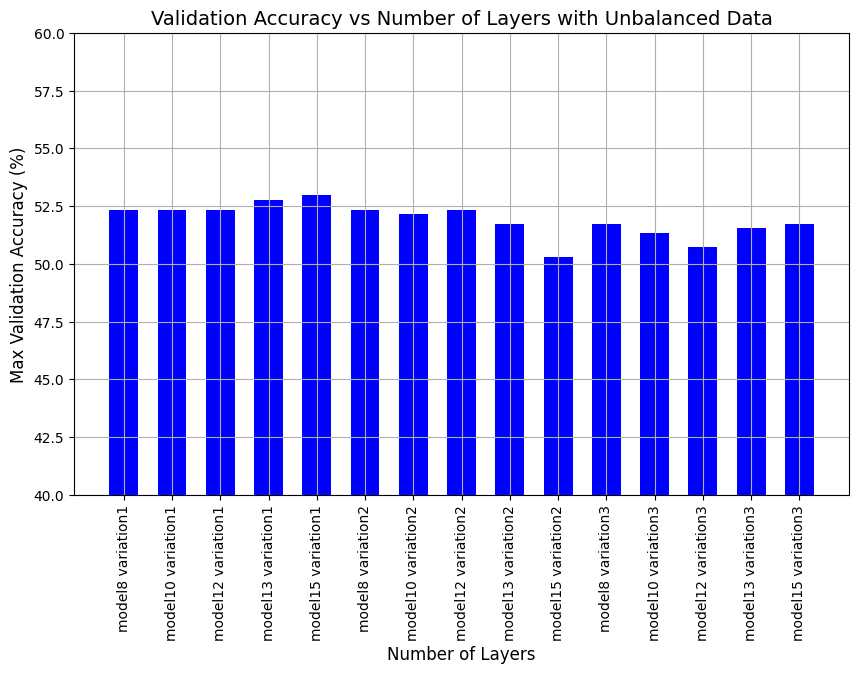

In [66]:
import matplotlib.pyplot as plt

# Extract the number of layers and corresponding validation accuracies
num_layers = [x[0] for x in histories]
val_accuracies = [x[1] for x in valid_maxes]

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the size to fit the labels
plt.bar(num_layers, val_accuracies, color='b', width=0.6)

# Add titles and labels
plt.xlabel('Number of Layers', fontsize=12)
plt.ylabel('Max Validation Accuracy (%)', fontsize=12)

# Rotate x-axis labels so they fit even if they're long
plt.xticks(rotation=90)
plt.ylim(40, 60)

# Show grid and plot
plt.grid(True)
if balance:
    plt.title('Validation Accuracy vs Number of Layers with Balanced Data', fontsize=14)
    plt.savefig('./plots/balanced_model_vs_val_acc', dpi=300)
else:
    plt.title('Validation Accuracy vs Number of Layers with Unbalanced Data', fontsize=14)
    plt.savefig('./plots/unbalanced_model_vs_val_acc', dpi=300)
plt.show()


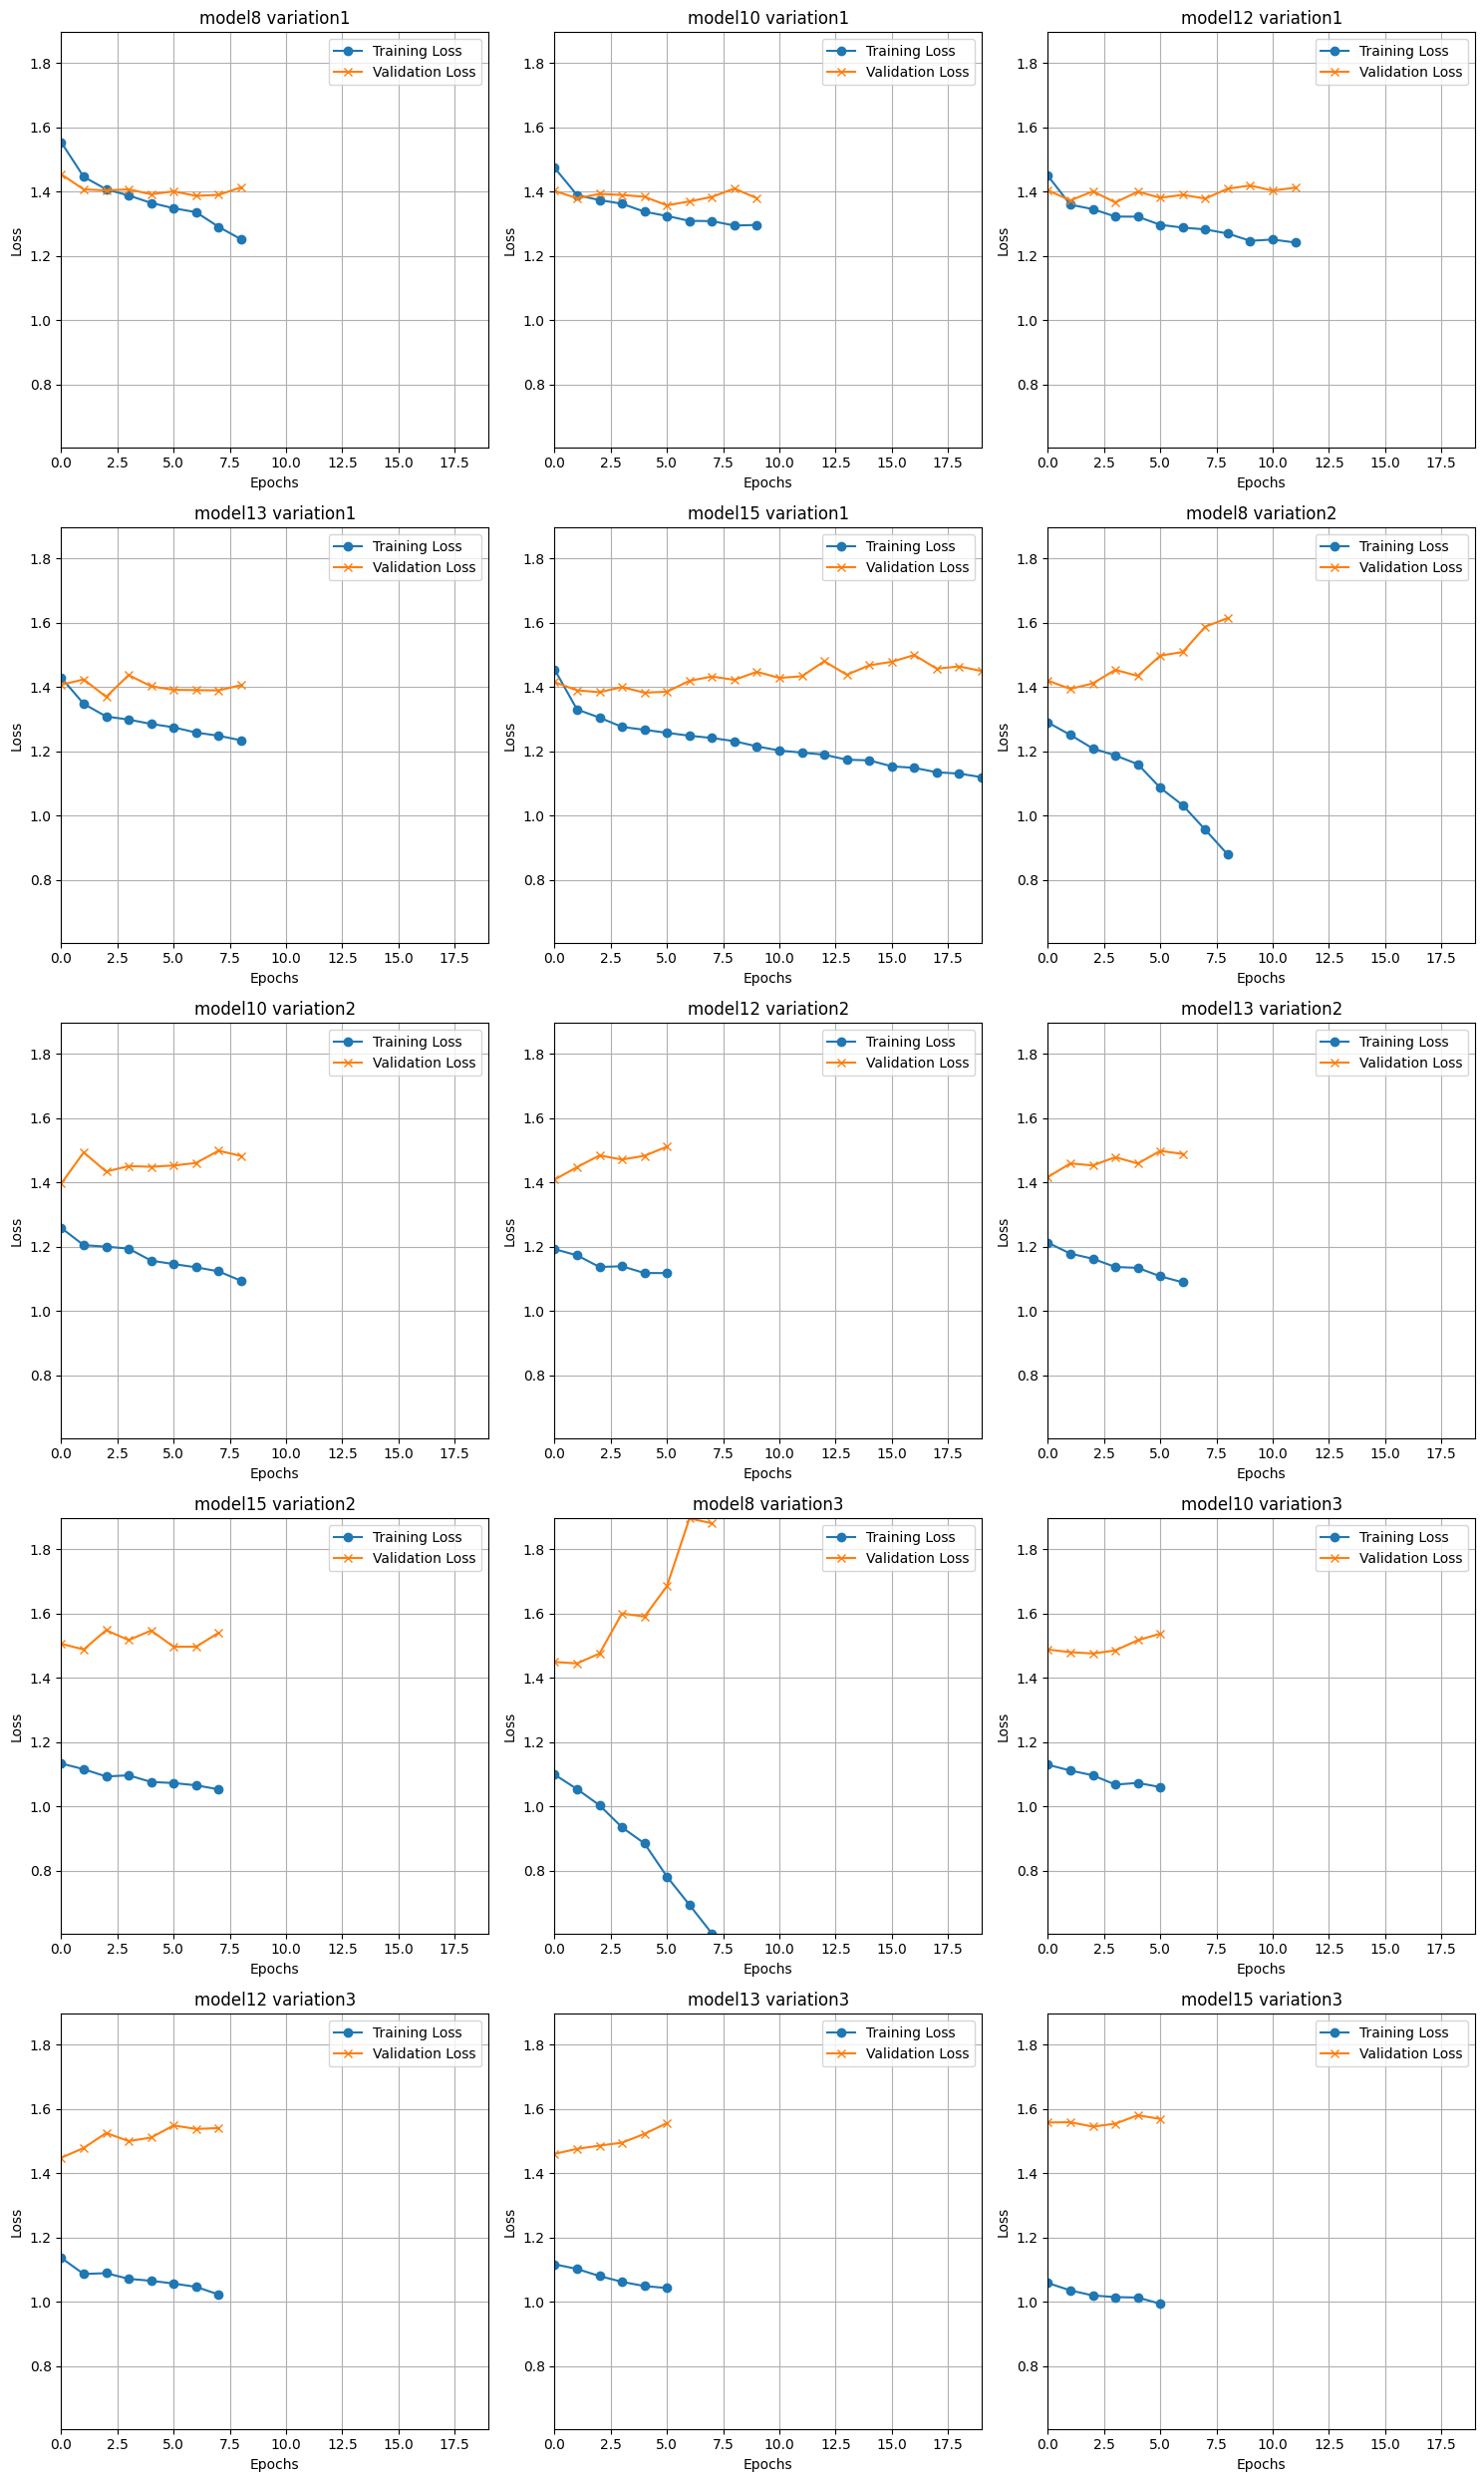

In [61]:
### plot all graphs individually
# for label, history in histories:
#     plt.figure(figsize=(10, 6))
    
#     # Extract loss and validation loss
#     train_loss = history.history['loss']
#     val_loss = history.history['val_loss']
    
#     # Plot
#     plt.plot(train_loss, label='Training Loss', marker='o')
#     plt.plot(val_loss, label='Validation Loss', marker='x')
    
#     # Add titles and labels
#     plt.title(f"Loss vs Epochs for {label}")
#     plt.xlabel("Epochs")
#     plt.ylabel("Loss")
#     plt.legend()
#     plt.grid(True)
    
#     # Show plot
#     plt.show()

### all in one graph
# Number of plots (one per label-history pair)
num_plots = len(histories)

# Calculate the number of rows and columns for the grid
cols = 3  # Choose the number of columns you want
rows = math.ceil(num_plots / cols)

# Determine the maximum epochs and loss range across all histories
max_epochs = max(len(history.history['loss']) for _, history in histories)
max_loss = max(max(max(history.history['loss']), max(history.history['val_loss'])) for _, history in histories)
min_loss = min(min(min(history.history['loss']), min(history.history['val_loss'])) for _, history in histories)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the grid for easy indexing

# Loop through histories and plot on each subplot
for i, (label, history) in enumerate(histories):
    ax = axes[i]
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    ax.plot(train_loss, label='Training Loss', marker='o')
    ax.plot(val_loss, label='Validation Loss', marker='x')
    ax.set_title(f"{label}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(True)
    
    # Set consistent axis scale
    ax.set_xlim(0, max_epochs - 1)
    ax.set_ylim(min_loss, max_loss)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
if balance:
    plt.savefig('./plots/balanced_train_vs_val_loss_grid.png', dpi=300)
else:
    plt.savefig('./plots/unbalanced_train_vs_val_loss_grid.png', dpi=300)
plt.show()


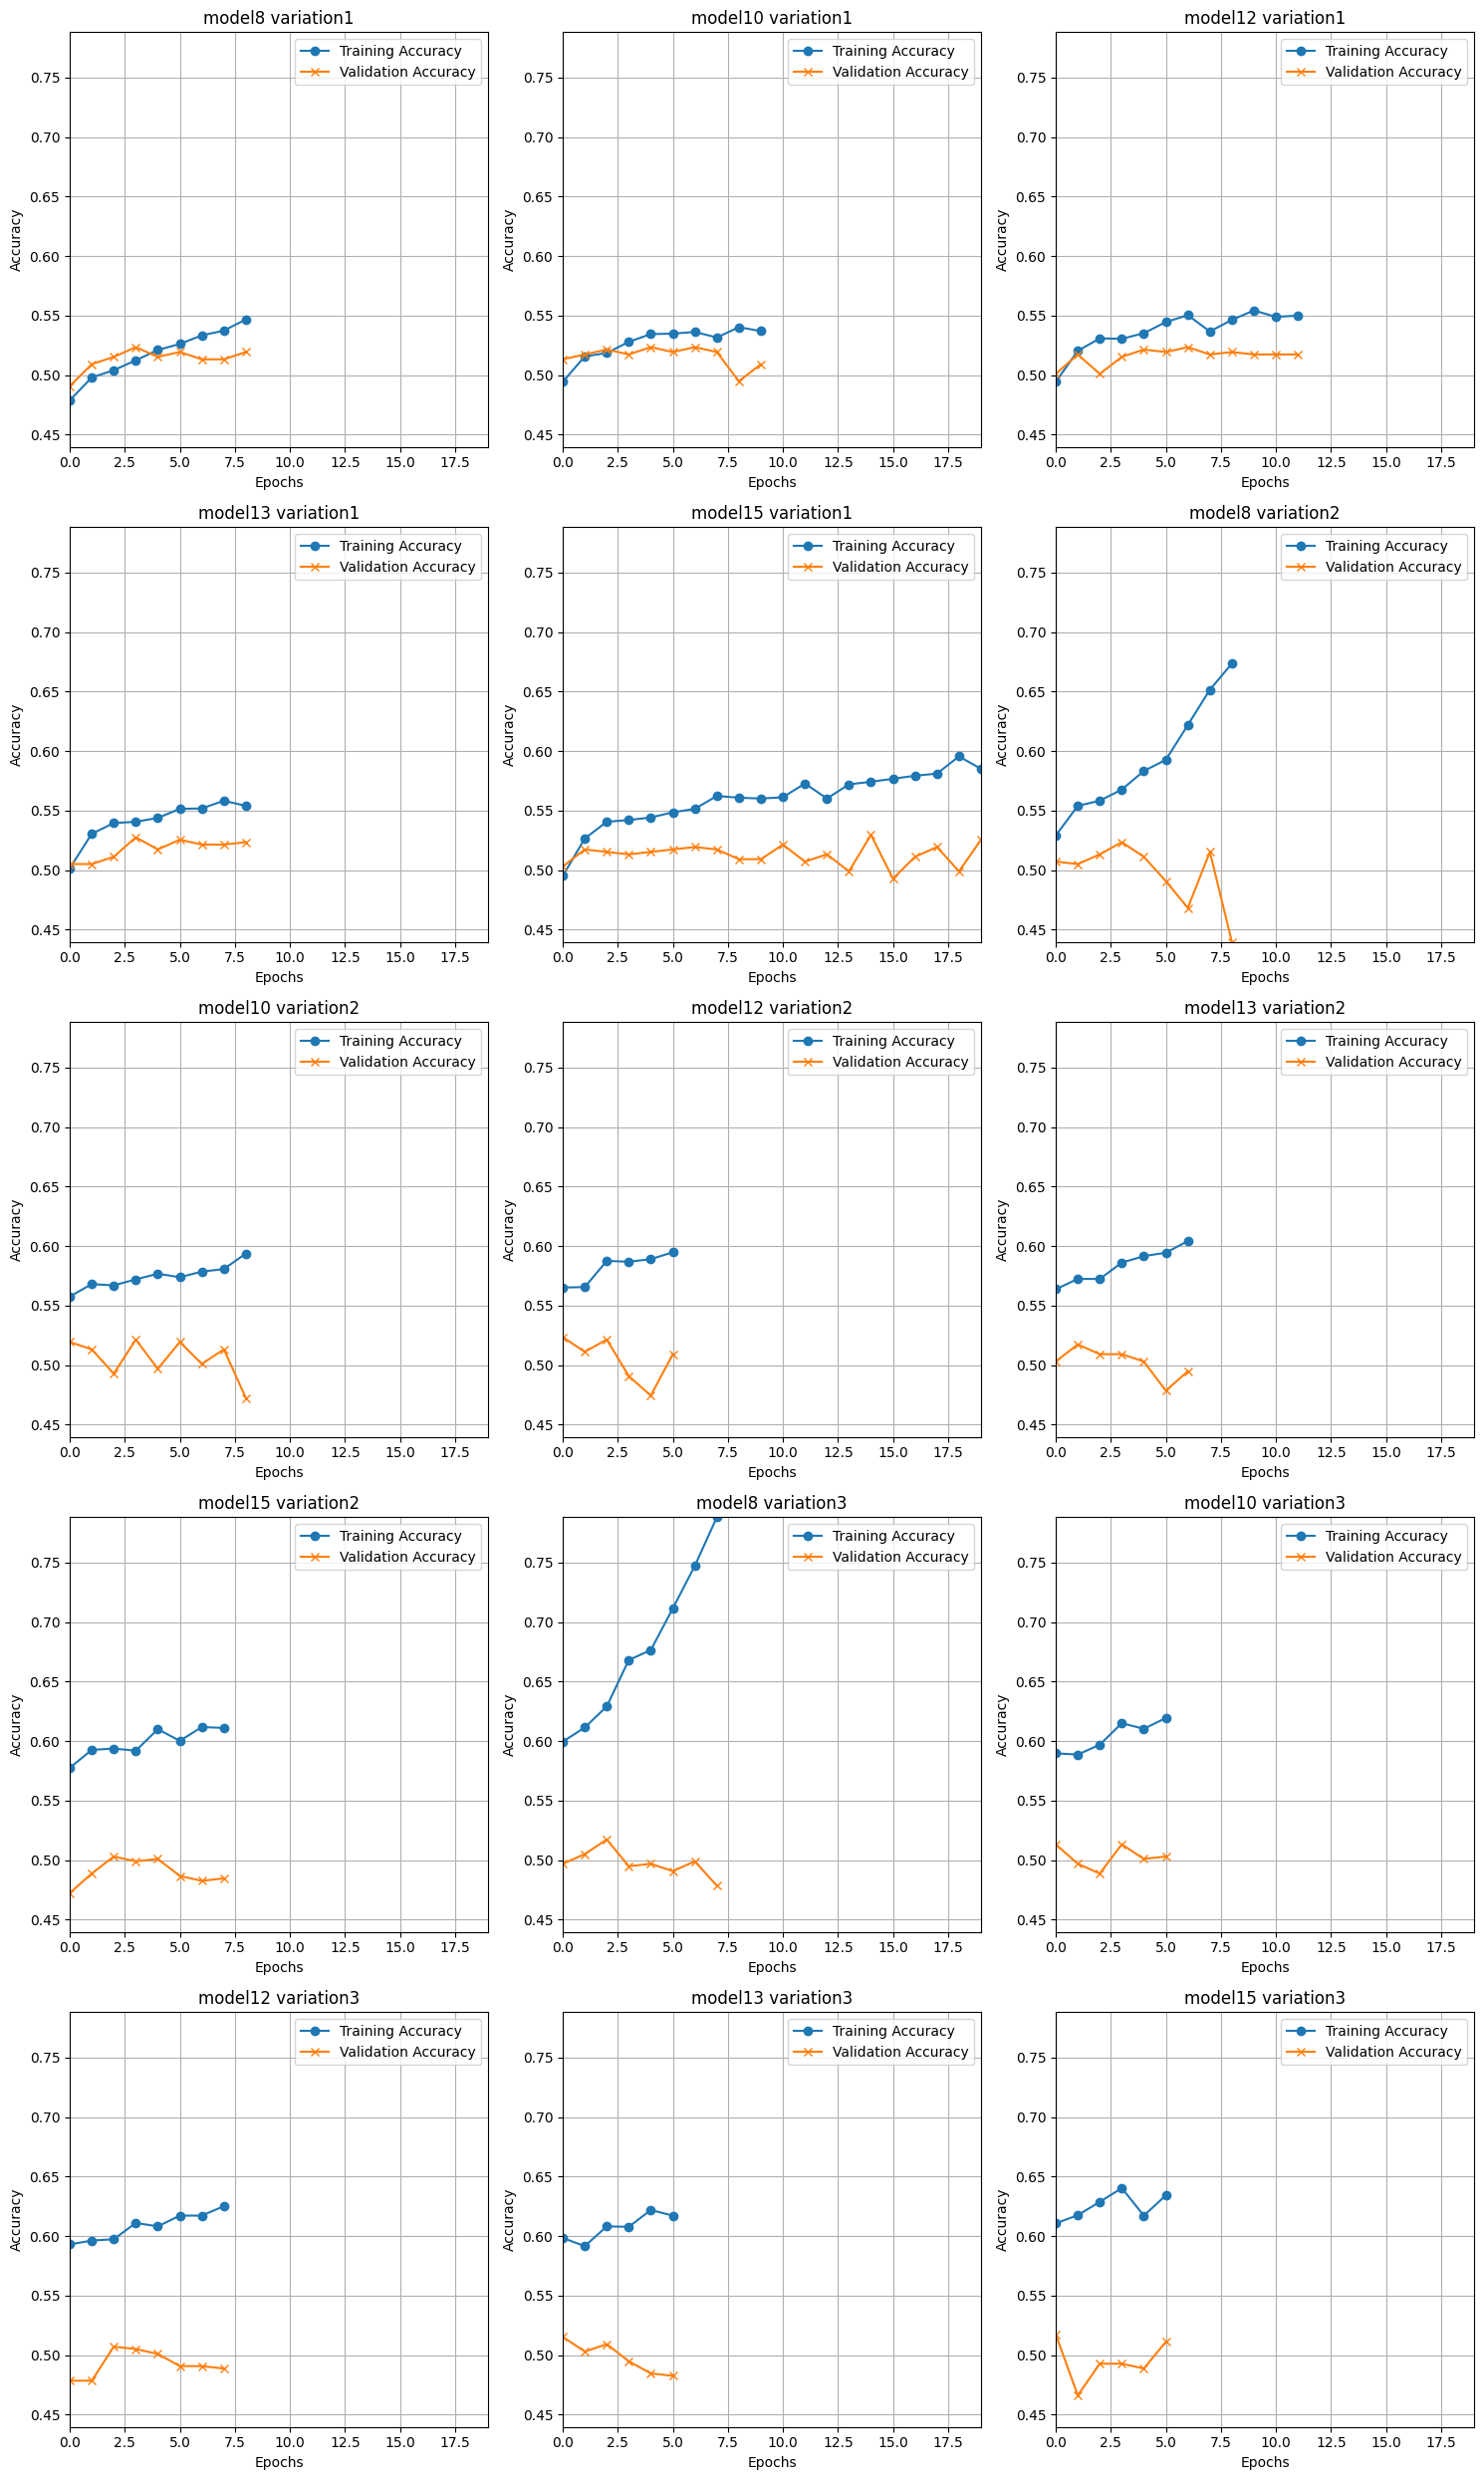

In [62]:
### graphs
# Plot training vs. validation accuracy
# for name, history in histories:
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title(f'Training and Validation Accuracy for {name}')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.savefig('./plots/train_vs_val_acc', dpi=300)
#     plt.show()

### all in one plot
# Number of plots (one per history)
num_plots = len(histories)

# Calculate the number of rows and columns for the grid
cols = 3  # Adjust based on preference
rows = math.ceil(num_plots / cols)

# Determine the maximum epochs and accuracy range across all histories
max_epochs = max(len(history.history['accuracy']) for _, history in histories)
max_accuracy = max(max(max(history.history['accuracy']), max(history.history['val_accuracy'])) for _, history in histories)
min_accuracy = min(min(min(history.history['accuracy']), min(history.history['val_accuracy'])) for _, history in histories)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the grid for easy indexing

# Loop through histories and plot on each subplot
for i, (label, history) in enumerate(histories):
    ax = axes[i]
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    ax.plot(train_accuracy, label='Training Accuracy', marker='o')
    ax.plot(val_accuracy, label='Validation Accuracy', marker='x')
    ax.set_title(f"{label}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(True)
    
    # Set consistent axis scale
    ax.set_xlim(0, max_epochs - 1)
    ax.set_ylim(min_accuracy, max_accuracy)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
if balance:
    plt.savefig('./plots/balanced_train_vs_val_acc_grid.png', dpi=300)
else:
    plt.savefig('./plots/unbalanced_train_vs_val_acc_grid.png', dpi=300)
plt.show()


In [63]:
print(x_text_train.shape)

(2767, 46)
